In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import timeit
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import toimage
from glob import glob
from ipy_table import *
from copy import deepcopy
import sys,os

%matplotlib inline

# Complex Networks: Assignment01

• We will explore real networks throughout the course performing some key
measurements introduced in Principles of Complex Systems.

• you are encouraged to use Python (along with, for example, NetworkX or
graph-tools).
•Data is available in two compressed formats:

– Matlab + text (tgz): http://www.uvm.edu/pdodds/teaching/courses/2019-01UVM-303/data/303complexnetworks-data-package.tgz

– Matlab + text (zip):http://www.uvm.edu/pdodds/teaching/courses/2019-01UVM-303/data/303complexnetworks-data-package.zip and can also be found on the course website (helpfully) under data.

• The main Matlab file containing everything is networkdata_combined.mat.

• For directed networks, the ij<sub>th</sub> entry of the adjacency matrix represents the weight of the link from node i to node j. Adjacency matrices for undirected networks are symmetric.

• For all questions below, treat each network as undirected unless otherwise instructed.

• For this assignment, convert all weights on links to 1, if the network is weighted.

• You do not have to use Matlab for your basic analyses. Python would be a preferred route for many.

• The supplied text versions may be of use for visualization using gml.

• The Matlab command spy will give you a quick plot of a sparse adjacency matrix.

• Real data sets used here are taken from Mark Newman’s compilation (and linked-to sites) at http://www-personal.umich.edu/~mejn/netdata/.
***

#### Problem 1:

Record in a table the following basic characteristics:

• $N$, the number of nodes;

• $m$, the total number of links;

• Whether the network is undirected or directed based on the symmetry of the adjacency matrix;

• $⟨k⟩$, the average degree ( $⟨k_{in}⟩$ and $⟨k_{out}⟩$ if the network is directed);

• The maximum degree $k_{max}$ (for both out-degree and in-degree if the network is directed);

• The minimum degree $k_{min}$ (for both out-degree and in-degree if the network is directed).
***

#### First, we will want to navigate the file directory and collect all of the .gml files containing the network information.

In [3]:
os.getcwd()

'C:\\Users\\Dave Landay\\Documents\\Complex_Networks_Spring2019\\Assignment_01'

In [4]:
ls | cd "" |  ls

2019-01UVM-303assignment01.pdf
303complexnetworks-data-package
303complexnetworks-data-package.zip
Assignment01_dlanday_2019-01-24.ipynb
Branching_Network_Sketch.xcf
Images


In [5]:
cd "303complexnetworks-data-package"

C:\Users\Dave Landay\Documents\Complex_Networks_Spring2019\Assignment_01\303complexnetworks-data-package


In [6]:
ls | cd "" | ls

networkdata_combined.mat
package


In [7]:
cd "package" 

C:\Users\Dave Landay\Documents\Complex_Networks_Spring2019\Assignment_01\303complexnetworks-data-package\package


In [8]:
ls | cd "" | ls

celegans
dolphins
internet
karate
polblogs
polbooks


In [9]:
cd ../..

C:\Users\Dave Landay\Documents\Complex_Networks_Spring2019\Assignment_01


#### The files are contained in each of these sub directories. We will want to extract them:

In [10]:
#locate the subdirectories:
path = os.getcwd() + '/303complexnetworks-data-package/package/*'
dirs = glob(path)

#for each file of interest, save the path into a dictionary for easy calling:
files = {}

for d in dirs:
    gml = glob(d+'/*.gml')
    files[d.split('\\')[-1:][0]] = gml[0]
          
print(files)

{'celegans': 'C:\\Users\\Dave Landay\\Documents\\Complex_Networks_Spring2019\\Assignment_01/303complexnetworks-data-package/package\\celegans\\celegansneural.gml', 'dolphins': 'C:\\Users\\Dave Landay\\Documents\\Complex_Networks_Spring2019\\Assignment_01/303complexnetworks-data-package/package\\dolphins\\dolphins.gml', 'internet': 'C:\\Users\\Dave Landay\\Documents\\Complex_Networks_Spring2019\\Assignment_01/303complexnetworks-data-package/package\\internet\\as-22july06.gml', 'karate': 'C:\\Users\\Dave Landay\\Documents\\Complex_Networks_Spring2019\\Assignment_01/303complexnetworks-data-package/package\\karate\\karate.gml', 'polblogs': 'C:\\Users\\Dave Landay\\Documents\\Complex_Networks_Spring2019\\Assignment_01/303complexnetworks-data-package/package\\polblogs\\polblogs.gml', 'polbooks': 'C:\\Users\\Dave Landay\\Documents\\Complex_Networks_Spring2019\\Assignment_01/303complexnetworks-data-package/package\\polbooks\\polbooks.gml'}


#### Now we want to load the .gml files into a network. Networkx has a built in function to read .gml files:
***
#### Be careful because the `read_gml` function expects nodes to have a `label` attribute. The Karate dataset is missing this field and networkx must be explicitly told this. We can just reference the `id` in place of the `label`. 

In [11]:
cele = nx.read_gml(files['celegans'])
dolp = nx.read_gml(files['dolphins'])
inte = nx.read_gml(files['internet'])
kara = nx.read_gml(files['karate'],label='id')
polb = nx.read_gml(files['polblogs'])
book = nx.read_gml(files['polbooks'])

#### NetworkX has some very useful tools that can simplify the process of deciding whether or not a graph is directed, weighted, acyclic etc...

In [12]:
nx.is_directed(cele)

True

#### The `is_directed` method does exactly what you think it does; determine if a network is directed

In [13]:
#create a list of networks:
graphs = [cele, dolp, inte, kara, polb, book]

#test to see which of them are directed:
for g in graphs:
    print(nx.is_directed(g))

True
False
False
False
True
False


#### So it looks as though the 'celegans' network and the 'polblogs' network are directed graphs, whereas the 'dolphins', 'internet', 'karate', and 'polbooks' networks are undirected graphs.
***
#### Finiding the number of nodes and edges in network also rely simple method calls in networkX:

In [14]:
#get the number of nodes and edges for each network:
network_names = list(files.keys())
for idx, g in enumerate(graphs):
    N = len(nx.nodes(g))
    m = len(nx.edges(g))
    name = network_names[idx]
    print('{} --> Number of Nodes (N): {}, Number of Edges (m): {}'.format(name, N, m))

celegans --> Number of Nodes (N): 297, Number of Edges (m): 2359
dolphins --> Number of Nodes (N): 62, Number of Edges (m): 159
internet --> Number of Nodes (N): 22963, Number of Edges (m): 48436
karate --> Number of Nodes (N): 34, Number of Edges (m): 78
polblogs --> Number of Nodes (N): 1490, Number of Edges (m): 19090
polbooks --> Number of Nodes (N): 105, Number of Edges (m): 441


***
#### We want to find the average degree $⟨k⟩$ of each network ( including: $⟨k_{in}⟩$ and $⟨k_{out}⟩$ for directed graphs), as well as k<sup>max</sup> and k<sup>min</sup>.  There are a few method calls that will easily allow us to do this.

In [15]:
graphs[0].out_degree('1')

9

In [16]:
graphs[0].in_degree('1')

2

In [17]:
graphs[0].degree('1')

11

In [18]:
nx.degree(graphs[0])

DiMultiDegreeView({'1': 11, '51': 34, '72': 80, '77': 54, '78': 56, '2': 15, '90': 44, '92': 20, '158': 22, '159': 17, '113': 16, '69': 12, '71': 84, '89': 40, '91': 26, '3': 16, '47': 20, '9': 11, '17': 19, '21': 13, '93': 19, '94': 21, '23': 16, '121': 21, '125': 7, '131': 6, '31': 7, '4': 20, '60': 6, '10': 11, '16': 13, '18': 25, '22': 13, '24': 14, '97': 14, '122': 18, '126': 10, '132': 6, '32': 9, '303': 12, '5': 10, '7': 15, '222': 28, '101': 19, '305': 139, '6': 8, '102': 17, '99': 25, '100': 26, '27': 14, '8': 17, '26': 10, '44': 18, '37': 12, '11': 8, '19': 8, '29': 8, '12': 9, '41': 25, '118': 37, '25': 8, '30': 9, '13': 13, '143': 29, '28': 13, '43': 12, '14': 14, '144': 24, '20': 9, '34': 14, '15': 11, '40': 25, '128': 18, '139': 21, '140': 21, '108': 19, '35': 8, '107': 17, '133': 7, '134': 5, '105': 2, '106': 3, '36': 9, '33': 10, '73': 54, '136': 15, '74': 54, '161': 22, '129': 6, '135': 12, '120': 29, '38': 13, '39': 6, '160': 25, '130': 4, '174': 20, '42': 7, '189': 1

#### We will use the methods from the examples listed above to help pull the descriptive statistics that we care about. The reader will note the distinction between the two `degree` functions listed above: One is an attribute of the `graph` object, which requires a specific node as an input and retrieves information about that particular node. The second is a method of the networkx class that retrieves information about the collection of nodes of an enitre graph object.

In [19]:
#find the avg. in and out degrees of each directed network, along with the minimum and maximum k_in and k_out:
def find_avg_in_out(g, minmax=False):
    """
       FIND_AVG_IN_OUT: takes a directed graph object and determines the average in and out degrees of the network,
                        as well as the degree distributions k_in, k_out.
       
                       ARGS:
                           g: a networkx DiGraph object. Type: DiGraph()
                           
                       minmax: indicates whether or not to also return max(k_in), max(k_out). Type: boolean
                           
                    RETURNS:
                            counts representing <k_in> and <k_out> and other 
                            statistics plus degree distributions(lists)
    """
    #get the k_in and k_out distributions:
    k_in  = [g.in_degree(n) for n in g.nodes]
    k_out = [g.out_degree(n) for n in g.nodes]
    
    #store the avg values:
    N = len(g.nodes)
    total_in  = sum(k_in)
    total_out = sum(k_out)
    avg_in    = total_in / N
    avg_out   = total_out / N
    
    #define the max in and out degrees:
    if minmax:    
        max_in  = max(k_in)
        max_out = max(k_out)
        min_in  = min(k_in)
        min_out = min(k_out)
        
        #return the degree distribution along with the relevant info:
        return {'N': N, 'm':len(g.edges), '<k_in>':avg_in, 
                '<k_out>':avg_out, 'k_max_out':max_out, 'k_max_in':max_in,
                'k_min_out':min_out, 'k_min_in':min_in, 'in_dist':k_in, 'out_dist': k_out, 'directed': True}
    else:
        return {'N': N, 'm':len(g.edges),'<k_in>': avg_in, 
                '<k_out>': avg_out, 'in_dist': k_in, 'out_dist': k_out, 'directed':True}
    
#now find the avg. degree <k> for undirected graphs, along with the minimum and maximum degree k:
def find_avg_k(g, minmax=False):
    """
       FIND_AVG_K: takes an undirected graph object and determines the average degree of the network,
                   as well as the degree distribution <k>.
       
                       ARGS:
                           g: a networkx DiGraph object. Type: DiGraph()
                           
                       minmax: indicates whether or not to also return max(k_in), max(k_out). Type: boolean
                           
                    RETURNS:
                            counts representing <k> and other statistcs plus degree distribution (list)
    """
    
    #get the degree distribution:
    k = [g.degree[n] for n in g.nodes] 
    
    #Store the values:
    N     = len(g.nodes)
    tot_k = sum(k)
    avg_k = sum(k) / N
    
    #get k_max and k_min:
    if minmax:
        k_min = min(k)
        k_max = max(k)
        
        return {'N':N, 'm': len(g.edges), 'avg_k': avg_k, 'k_max': k_max, 'k_min': k_min, 'deg_dist': k,
                'directed': False}
    else:
        return {'N':N, 'm': len(g.edges), 'avg_k': avg_k, 'deg_dist': k, 'directed': False}
        
        

#### It should be noted that for directed graphs, the `degree sum formula` gives 
${\displaystyle \sum _{v\in V}\deg ^{-}(v)=\sum _{v\in V}\deg ^{+}(v)=|A|.}$
#### where $\deg ^{-}(v)$ denotes the out degree of vertex $v$, and $\deg ^{+}(v)$ denotes the in degree of vertex $v$. So, we could have used this fact to more efficiently calculate $<k_{in}>$ and $<k_{out}>$
***
#### Let's use the functions to obtain the values we care about:

In [20]:
#list of directed graphs:
directed = [graphs[0], graphs[4]]

#list of undirected graphs:
undirected = [graphs[1], graphs[2], graphs[3], graphs[5]]

d  = []
ud = []
#get information:
for g in directed:
    info = find_avg_in_out(g, True) 
    d.append(info)
for g in undirected:
    info = find_avg_k(g, True) 
    ud.append(info)

#### Just for sanity, we might want to recombine the lists in the same order as the graphs appear in the `graphs` list. That way we preserve indexing and can easily add a `name` field to identify which network each set of data came from. We could have used Pandas to do all of this more efficiently, but whatever...

In [21]:
information = [d[0]]
information.extend(ud[:-1])
information.extend([d[-1],ud[-1]])

#now add a name field id'ing each network:
for idx, g in enumerate(information):
    g['name'] = network_names[idx]

In [22]:
#sanity check:
for i in range(len(information)):
    print(information[i]['name'])

celegans
dolphins
internet
karate
polblogs
polbooks


#### Now, we can display our information in a tabulated format. The IPython.display module and the ipy_table library are great tools to generate markdown table output:

In [23]:
#list of dict keys we care about:
keys_of_interest = ['name', 'directed', 'N', 'm', 'avg_k', '<k_in>','<k_out>',
                    'k_max', 'k_min', 'k_max_in', 'k_max_out','k_min_in', 'k_min_out']

Headers = ['Name', 'Directed', '$N$', '$m$', '<$k$>', '<$k_{in}>$','<$k_{out}$>', '$k^{max}$',
           '$k^{min}$', '$k^{max}_{in}$', '$k^{max}_{out}$','$k^{min}_{in}$', '$k^{min}_{out}$']

#create the table:
disp_table = [Headers,
              [],
              [],
              [],
              [],
              [],
              []]

#populate it:
for idx, i in enumerate(information):
    for ind, k in enumerate(keys_of_interest):
        try:
            disp_table[idx+1].append(i[k])
        except KeyError:
            disp_table[idx+1].append('--')

#display it:
make_table(disp_table)

Name,Directed,$N$,$m$,<$k$>,<$k_{in}>$,<$k_{out}$>,$k^{max}$,$k^{min}$,$k^{max}_{in}$,$k^{max}_{out}$,$k^{min}_{in}$,$k^{min}_{out}$
celegans,True,297,2359,--,7.9428,7.9428,--,--,139,39,0,0
dolphins,False,62,159,5.1290,--,--,12,1,--,--,--,--
internet,False,22963,48436,4.2186,--,--,2390,1,--,--,--,--
karate,False,34,78,4.5882,--,--,17,1,--,--,--,--
polblogs,True,1490,19090,--,12.8121,12.8121,--,--,338,256,0,0
polbooks,False,105,441,8.4000,--,--,25,2,--,--,--,--


#### Note that an alternative to all of this is a simple function call in networkx:

In [24]:
#print information for each network as a comparison:
for g in graphs:
    print(nx.info(g))

Name: 
Type: MultiDiGraph
Number of nodes: 297
Number of edges: 2359
Average in degree:   7.9428
Average out degree:   7.9428
Name: 
Type: Graph
Number of nodes: 62
Number of edges: 159
Average degree:   5.1290
Name: 
Type: Graph
Number of nodes: 22963
Number of edges: 48436
Average degree:   4.2186
Name: 
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882
Name: 
Type: MultiDiGraph
Number of nodes: 1490
Number of edges: 19090
Average in degree:  12.8121
Average out degree:  12.8121
Name: 
Type: Graph
Number of nodes: 105
Number of edges: 441
Average degree:   8.4000


#### Printing out the information with a built in function is not a great learning experience. Furthermore, the output does not include the names of each network, as we were able to include in our table. But, the output does serve as a comparison tool to ensure the information we extracted on our own is validated.

***

#### One last thing we might wish to look at is the adjacency matrix of each network. Rows represent nodes, and columns represent links between nodes (0 $\rightarrow$ no edge, 1$\rightarrow$ an edge).

In [25]:
heat_maps = [nx.adjacency_matrix(g).todense() for g in graphs]

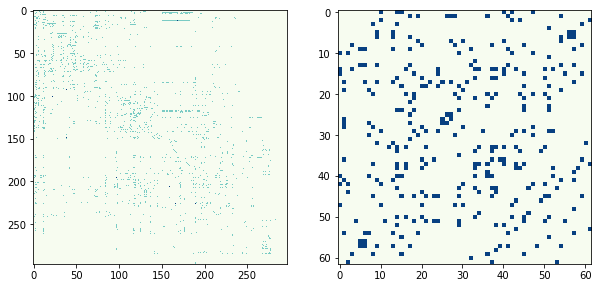

In [26]:
def make_map(ax, adjMat, title, color):
    """
        MAKE_map: takes an adjacency matrix and produces a heat map
        
                ARGS:
                    ax:     a subplot artist object. ex.) fig, ax = plt.subplots()
                    adjMat: a representation of an adjacency matrix. Type: 2D array
                    title: a string representing the plot title. Type: string
                    xlabel: a string representing the x-axis label. Type: string
                    ylabel: a string representing the y-axis label. Type: string
                    
            RETURNS:
                    a plot artist object
    """
    
    im = ax.imshow(adjMat,
                   interpolation=None,
                   cmap=color)
    #ax.pcolor=(adjMat, edgecolors='k', linewidth=1)
    
#initialize a subplot. We have 6 networks, so we will produce a 2x3 grid of matrices:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))

#make the plots:
make_map(ax1, heat_maps[0], 'Celegans Network Adjacency Matrix', 'GnBu')
make_map(ax2, heat_maps[1], 'Dolphins Network Adjacency Matrix', 'GnBu')
#make_map(ax3, heat_maps[2], 'Karate Network Adjacency Matrix', 'Greys')
# make_map(ax4, heat_maps[3], 'Internet Network Adjacency Matrix', 'Greys')
# make_map(ax5, heat_maps[4], 'Polblogs Network Adjacency Matrix', 'Greys')
# make_map(ax6, heat_maps[5], 'Polbooks Network Adjacency Matrix', 'Greys')

#show()
plt.show()

#### Problem 2.
##### (a)
Plot the degree distribution $P_k$ as a function of $k$. In the case that $P_k$ versus $k$ is uninformative, also produce plots that are clarifying. For example, $\log_{10}P_k$ versus $\log_{10}k$.
(Note: Always use base 10.)
***

#### The degree of a node is the number of connections (edges) that a node has to other nodes (number of neighbors). The degree distribution, $P_k$, is the fraction of nodes in the network of degree $k$. By plotting the degree distribution against the degree, we get an idea of how the "connectivity" of a network scales with increasing degree. One would expect that the number of nodes of degree $k$ decreases as $k$ increases, so it is likely that the networks will describe power-law size distributions. But, that isn't always the case...

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


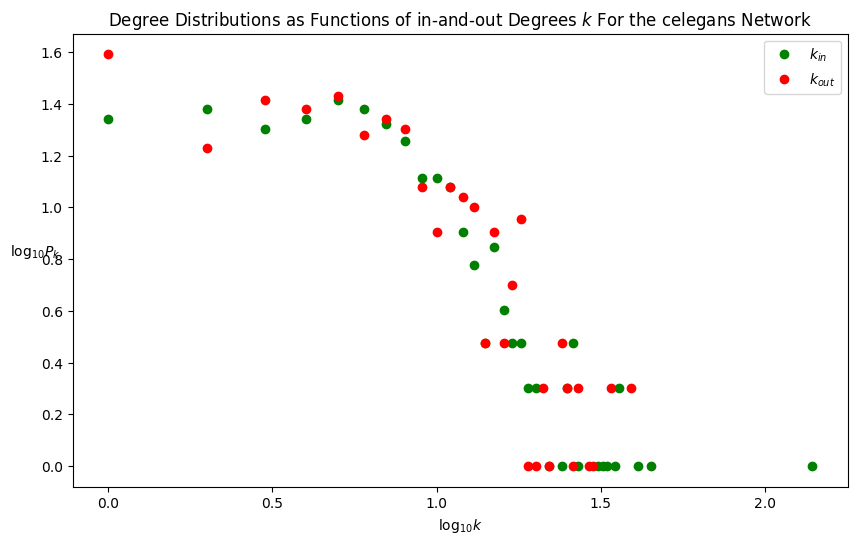

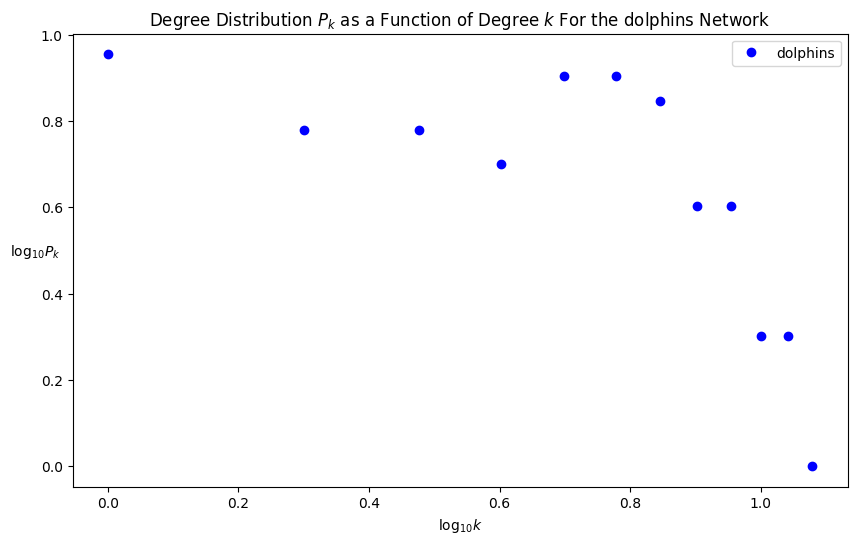

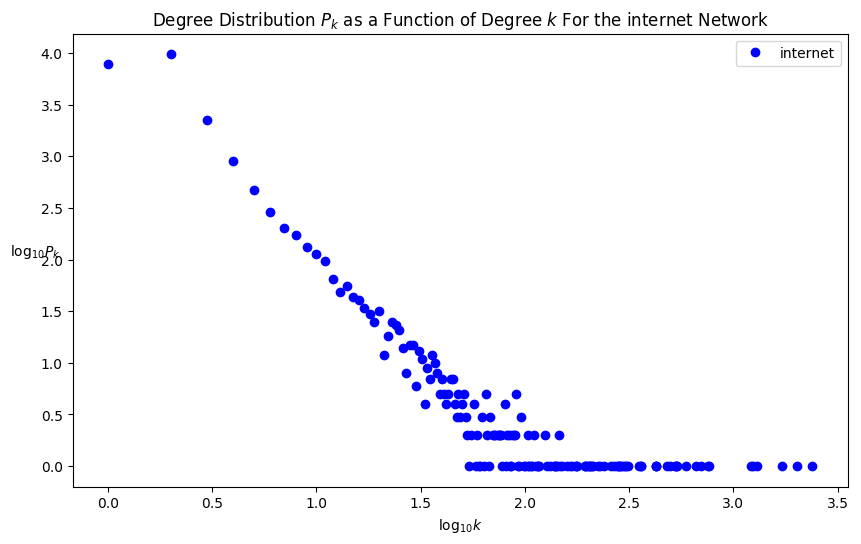

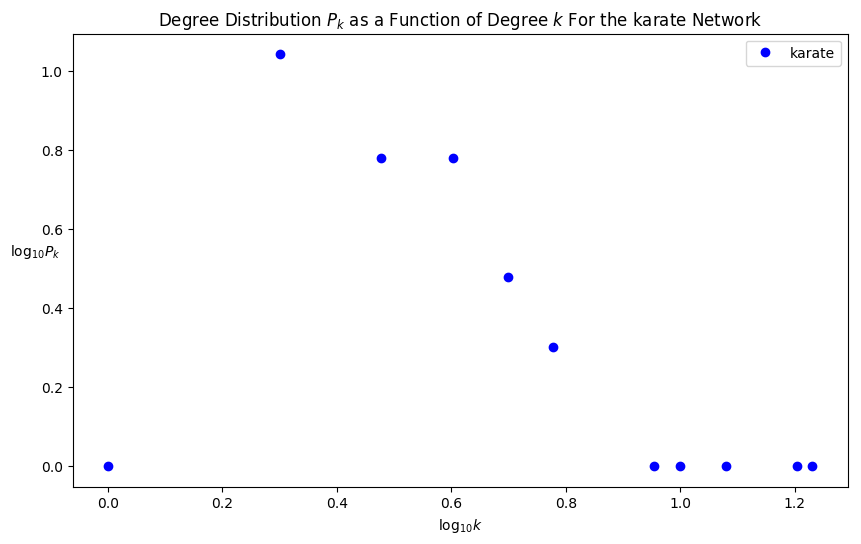

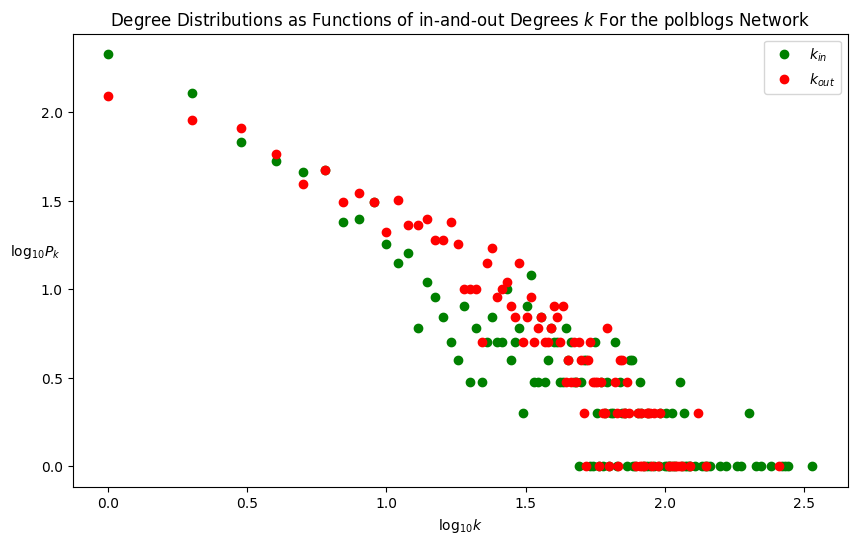

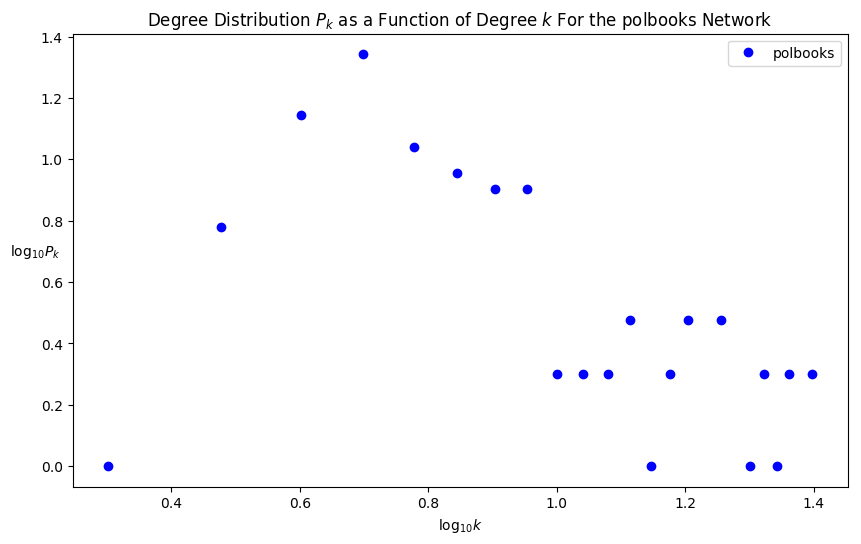

In [28]:
for network in information:
    #plot P_k vs k using counter objects:
    plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
    
    if network['directed'] == False:
        #get P_k and k with Counter:
        x ,y = list(Counter(network['deg_dist']).keys()), list(Counter(network['deg_dist']).values())

        #Plot the relationship:
        plt.title(r'Degree Distribution $P_k$ as a Function of Degree $k$ For the {} Network'.format(network['name']))
        plt.xlabel(r'$\log_{10} k$')
        plt.ylabel(r'$\log_{10} P_k$', rotation='horizontal')
        plt.plot(np.log10(x), np.log10(y), 'o', color='blue', label=network['name'])
        plt.legend(loc='upper right')
        plt.show()
    else:
        x_in, x_out, y_in, y_out = (list(Counter(network['in_dist']).keys()),
                                    list(Counter(network['out_dist']).keys()),
                                    list(Counter(network['in_dist']).values()),
                                    list(Counter(network['out_dist']).values()))
        plt.title(r'Degree Distributions as Functions of in-and-out Degrees $k$ For the {} Network'.format(network['name']))
        plt.xlabel(r'$\log_{10} k$')
        plt.ylabel(r'$\log_{10} P_k$', rotation='horizontal')
        plt.plot(np.log10(x_in), np.log10(y_in), 'o', color='green', label=r'$k_{in}$')
        plt.plot(np.log10(x_out), np.log10(y_out), 'o', color='red', label=r'$k_{out}$')
        plt.legend(loc='upper right')
        plt.show()

#### One may observe that the scaling laws are less meaningful/ visible on a linear plot scale:

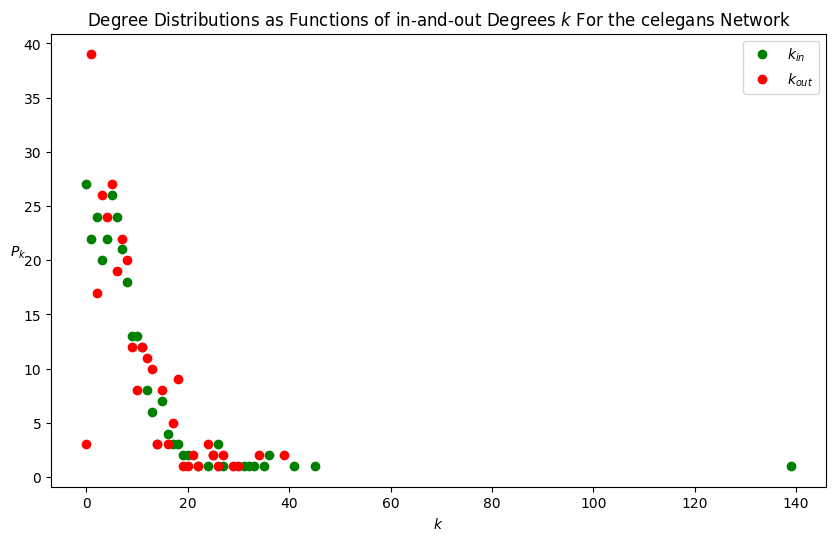

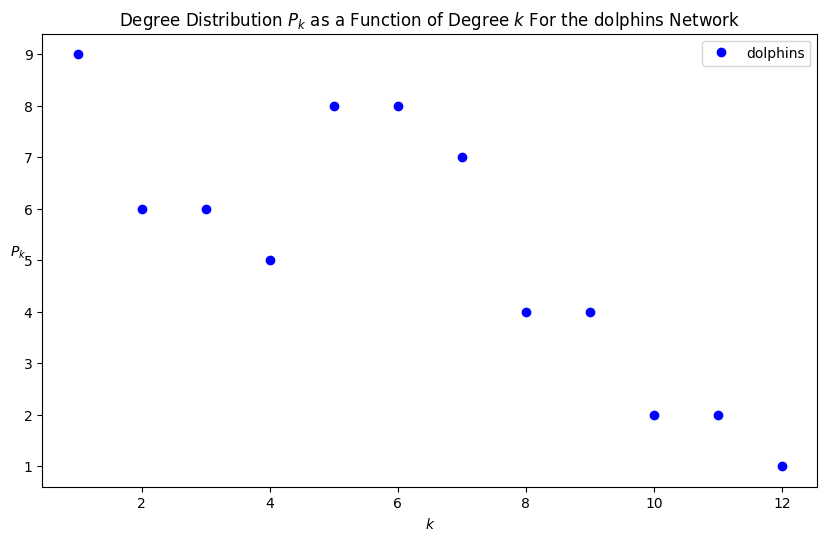

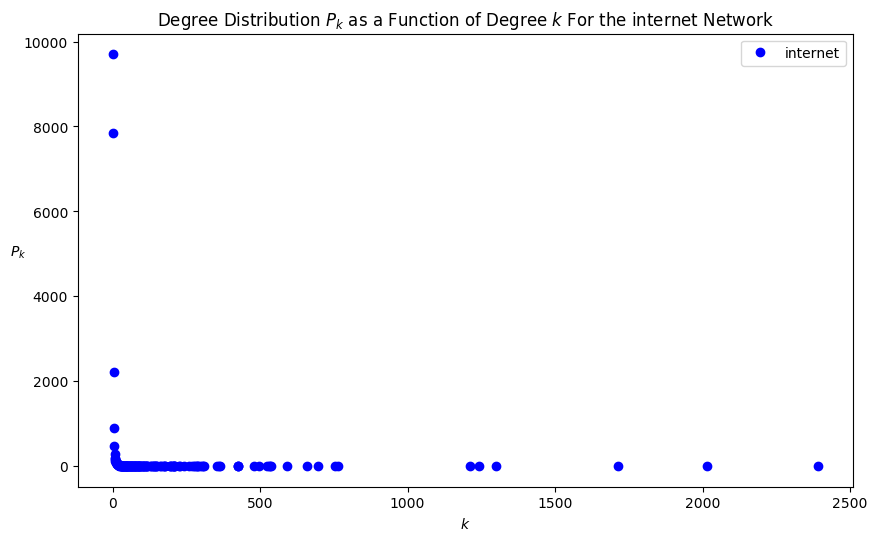

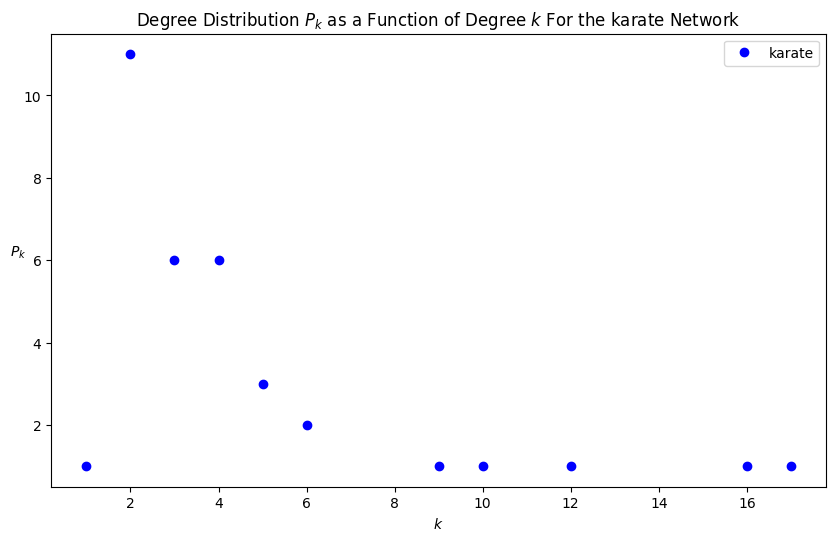

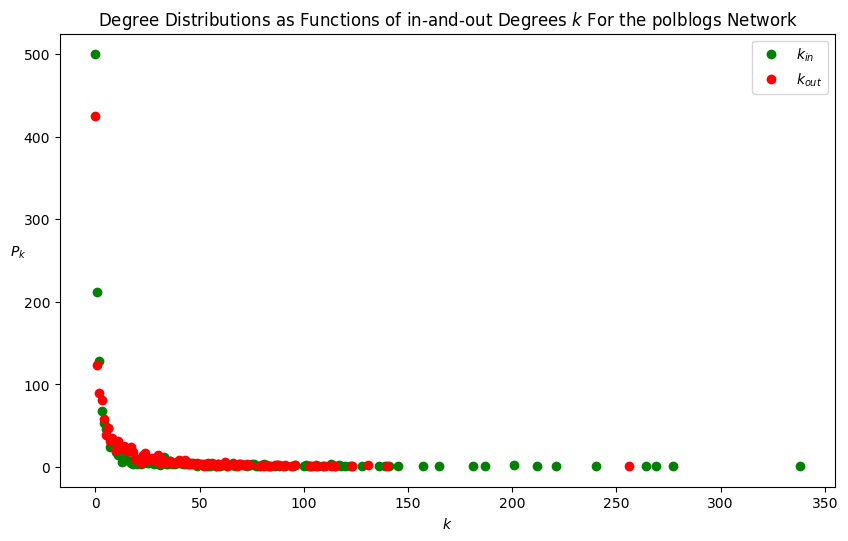

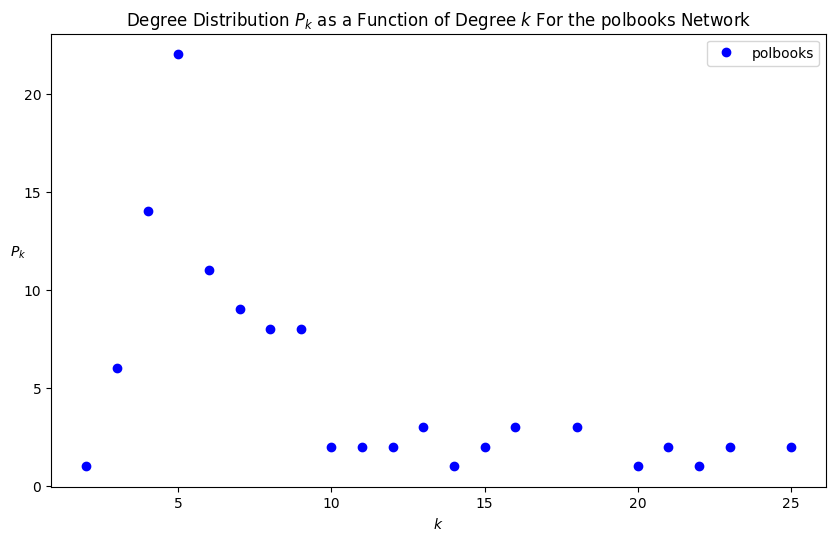

In [29]:
for network in information:
    #plot P_k vs k using counter objects:
    plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
    
    if network['directed'] == False:
        #get P_k and k with Counter:
        x ,y = list(Counter(network['deg_dist']).keys()), list(Counter(network['deg_dist']).values())

        #Plot the relationship:
        plt.title(r'Degree Distribution $P_k$ as a Function of Degree $k$ For the {} Network'.format(network['name']))
        plt.xlabel(r'$k$')
        plt.ylabel(r'$P_k$', rotation='horizontal')
        plt.plot(x, y, 'o', color='blue', label=network['name'])
        plt.legend(loc='upper right')
        plt.show()
    else:
        x_in, x_out, y_in, y_out = (list(Counter(network['in_dist']).keys()),
                                    list(Counter(network['out_dist']).keys()),
                                    list(Counter(network['in_dist']).values()),
                                    list(Counter(network['out_dist']).values()))
        plt.title(r'Degree Distributions as Functions of in-and-out Degrees $k$ For the {} Network'.format(network['name']))
        plt.xlabel(r'$k$')
        plt.ylabel(r'$P_k$', rotation='horizontal')
        plt.plot(x_in, y_in, 'o', color='green', label=r'$k_{in}$')
        plt.plot(x_out, y_out, 'o', color='red', label=r'$k_{out}$')
        plt.legend(loc='upper right')
        plt.show()

***

##### (b)
See if you can characterize the distributions you find (e.g., exponential, power law, etc.).

***
#### Problem 3.
Measure the clustering coefficient $C_2$, where, $C_2 =\frac{3\ \times\ \text{#triangles}}{\text{#triples}}$

For directed networks, transform them into undirected ones first. One approach is to compute:
                $C_2 = \frac{3\ \times\ \frac{1}{6}\mathbf{Tr}A^3}{\frac{1}{2}\ (\Sigma_{ij}\ [A]^{2}_{ij}\ -\ \mathbf{Tr}A^2)}$

##### Note:
avoiding computing $A^3$ is important and can be done.
***
#### The First step is to turn the directed graphs into undirected ones. In essence, we want to create a deep copy of each directed network such that we ensure that all edges are bidirectional. In a directed graph, you are not guarunteed to have an edge between a node and its neighbor given that an edge exists from the neighbor to the node in question (hence, the notion of in_degree and out_degree). In fact, a directed graph is called "acyclic" when no "cycles" occur; AKA, for all nodes $i$ and $j$ in a network, if node $i$ links to node $j$, then $j$ does not link back to $i$. Formally, this is called a DAG (Directed Acyclic Graph). Hence, ensuring edges exist between nodes such that an edge $(i,j) = (j,i)$ is what is desired.

#### We can implement a `try, except` statement to do this for us, or we can use the built in functionality of networkx:

In [30]:
#we will try to implement this function on our own and store output in the undirected list of graphs.
#for now, just populate this list with the deepcopies:
temp = []

#recall that we stored a list of the directed graphs:
for idx,graph in enumerate(directed):
    temp.append(graph.to_undirected())
    #sanity check:
    print(nx.is_directed(temp[idx]))

False
False


#### Nice! Now we can implement the function ourselves. We may first want to see any relevant information pretaining to the new undirected copies of the graphs:

In [31]:
#describe each temp network copy:
for network in temp:
    print(nx.info(network))

Name: 
Type: MultiGraph
Number of nodes: 297
Number of edges: 2162
Average degree:  14.5589
Name: 
Type: MultiGraph
Number of nodes: 1490
Number of edges: 16783
Average degree:  22.5275


#### Ok, so achieving these stats will (hopefully) provide a hint that we successfully converted the graphs into undirected ones.

In [32]:
def swap(i,j):
    """
        SWAP: Takes an edge (a,b) and returns a tuple with the elements of the input swapped.
              Ex.) (a,b) --> (b,a). Type: tuple
        
            ARGS:
                i: node that connects to another node j. Type:Str, int, float... node representation
                j: node that connects (is connected to by) node i. Type:Str, int, float... node representation
         
         RETURNS: a tupple representation of the edge with the elements swapped
         
    """
    return (i,j)

def bidirectional_edge(i,j):
    """
        BIDIRECTIONAL_EDGE: Takes two nodes that are connected with an edge, adds an edge between
                            the "swapped" direction of the two nodes.
                            Ex.) (a,b) --> [(a,b),(b,a)]
                        
                        ARGS:
                            i: node that connects to another node j. 
                               Type:Str, int, float... node representation
                            j: node that connects (is connected to by) node i. 
                               Type:Str, int, float... node representation
                    RETURNS:
                            a list of tuples representing an undirected edge between two nodes.
                    
    """
    return [(i,j), swap(i,j)]

def convert_graph(a_multigraph):
    """
        CONVERT_GRAPH: Takes a multigraph structure and converts it into an undirected graph object
        
                    ARGS:
                        a_multigraph: a networkx MultiGraph object. Type: MultiGraph
                    
                RETURNS:
                        an undirected graph
    
    """
    
    #create the undirected graph object to populate:
    G = nx.Graph()
    
    #get the nodes from the multigraph:
    G.add_nodes_from(a_multigraph)
    
    #get the undirected set of edges:
    edges = []
    for i,j in a_multigraph.edges():
        edges.extend(bidirectional_edge(i,j))
    
    #add them to G:
    G.add_edges_from(edges)
    
    #return:
    return G

*Note, We don't really need a function for the swap
***
#### Let's see if that worked:

In [33]:
test = convert_graph(directed[0])
test_1=convert_graph(directed[1])
print(nx.info(test))
print(test.is_directed())
print(nx.info(test_1))
print(test_1.is_directed())

Name: 
Type: Graph
Number of nodes: 297
Number of edges: 2148
Average degree:  14.4646
False
Name: 
Type: Graph
Number of nodes: 1490
Number of edges: 16718
Average degree:  22.4403
False


#### Excellent. Now we can use built in functionality of networkx to find the $C_2$ transitivity of the network:

In [37]:
#add graphs to a single list:
all_graphs = [test]
all_graphs.extend([i for i in undirected[:3]])
all_graphs.append(test_1)
all_graphs.append(undirected[-1])

#calculate transitivity:
for g in all_graphs:
    start = timeit.default_timer()
    print(nx.transitivity(g))
    stop = timeit.default_timer()
    print('Time-to-complete: ',stop - start)

0.18071147126607687
Time-to-complete:  0.0685482008604481
0.3087757313109426
Time-to-complete:  0.0027951452739927163
0.011146383847822162
Time-to-complete:  5.969536936459193
0.2556818181818182
Time-to-complete:  0.001507479665050937
0.2259585173589758
Time-to-complete:  0.8293905077961199
0.34840315221899626
Time-to-complete:  0.007835900681683938


In [35]:
information[2]['name']

'internet'

#### You can see that the time to calculate the transitivity for the internet graph is quite substantial, given the quantity of nodes in the network

In [36]:
nx.transitivity(graphs[2])

0.011146383847822162